This is a study about the runtime of a different sorting algorithms.
Since sorting is a very basic operation and various methods exist, choosing a correct sorting algo can make a program more efficient. For clarity purpose, I am only focusing on positive integer sorting using numbers randomly generated.<br/><br/>
Importing time and plot libraries:

In [0]:
import time
import matplotlib.pyplot as plt
import random
import math

The following is the tester function that we will use to test the functions.<br/><br/>In this test, input size of **100 <= N <= 1000** of random integers **(1-1000)** will be tested.<br/>For each input size, 100 tries are commited, then the median time of these 100 tries is recorded.

In [0]:
def tester(functions, inc_n2 = True, inc_logn = True):

  numbers = []
  ref = []
  nlogn = []
  results = {}
  
  factor = 0
  factor2 = 0

  for i in range(1, 11):
    _new = []
    for c in range(i*100):
      _new.append(random.randrange(1000))
    numbers.append(_new)

  for func in functions:
    median = []
    count = 1
    for sets in numbers:
      comp = []
      for i in range(100):
        start = time.time()
        temp = func(sets)
        end = time.time()
        comp.append(end - start)
      median.append(sorted(comp)[len(comp)//2])

      if not len(results):
        if not len(ref):
          ref.append(median[0])
          factor = 1 / ref[0]
          nlogn.append(median[0])
          factor2 = 1 / nlogn[0]
        else:
          ref.append(count * count / factor)
          nlogn.append(count * math.log(count) / factor)
      count = count + 1
    results[func.__name__] = median
    

  if inc_n2:
    plt.plot(ref, "--", color = "#cccccc", label='$n^{2}$')
  if inc_logn:
    plt.plot(nlogn, "--", color = "#FAB6A8", label='nlog(n)')
  for name in results:
    plt.plot(results[name], label=name)
  plt.xlabel('Per 100 input')
  plt.ylabel('Time (s)')
  plt.legend()
  plt.show()

<br/>
<br/>A simple insertion sort:

In [0]:
def insertionSort(a_list):
  AllSorted = [a_list[0]]
  for i in a_list[1:]:
    for j in range(len(AllSorted)):
      if i < AllSorted[j]:
        AllSorted.insert(j, i)
        break
      elif j == len(AllSorted) - 1:
        AllSorted.append(i)
  
  return AllSorted



<br/><br/>To verify it's working:

In [265]:
newlist = [6,7,10,9,3,44,35]

_result = insertionSort(newlist)
print(_result)

[3, 6, 7, 9, 10, 35, 44]


<br/>Starting the testing, plotted against reference line n^2 and nlog(n).<br/>

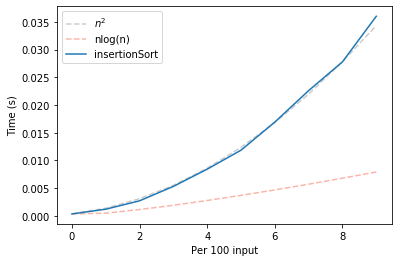

In [172]:
tester([insertionSort])

<br/>Looks like insertion sort falls into the n^2 category nicely.<br/>
A pretty basic sorting algorithm, it is known to be simple in concept but quite inefficient. Having to insert a new number into a sorted list, it is easy to imagine that a lot of pointless comparisons are involved.<br/><br/>
**Can we improve it?**<br/><br/>
Apparently, the insertion part can be done more intelligenetly. We already know the list we want to insert into is sorted. Given this assumption, I reckon it is quicker if we use a binary search to find the position we want to insert into. This should reduce the time needed to find the insert considerably.<br/><br/>
To do this, we have to make a binary insert function:


In [0]:
def binInsert(num, sortedList):

  target = sortedList
  mid = len(target)
  temp = 0

  while mid >= 1:
    mid = len(target) // 2
    if num <= target[mid]:
      target = target[:mid]
    else: 
      target = target[mid:]
      temp += mid
  
  if num < sortedList[temp]:
    sortedList.insert(temp, num)
  else:
    sortedList.insert(temp+1, num)
  return sortedList

<br/>To verify it is working:<br/>

In [262]:
_new = [1,2,3,4,5,7,9,10,12,14]
print(binInsert(13, _new))

[1, 2, 3, 4, 5, 7, 9, 10, 12, 13, 14]


<br/>Now, make an identical insertion sort B, but replace the insertion part with the binInsert function we defined:<br/>

In [0]:
def insertionSortB(a_list):
  AllSorted = [a_list[0]]
  for i in a_list[1:]:
    AllSorted = binInsert(i, AllSorted)
  
  return AllSorted

<br/><br/>Testing it side-by-side with the original:

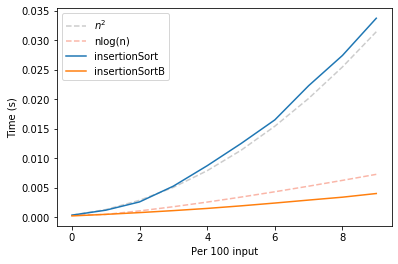

In [270]:
tester([insertionSort, insertionSortB])

Now this is some good optimization.<br/>
Using a binary insertion, seems that we have improved the original insertionSort and make it reach the **nlog(n)** territory.<br/>
How does it compare with the better search methods?

For the sake of science, let's try other sorting algorithms. <br/>
Lets try **Merge sort**?<br/>
<br/>
A recursive merge sort:

In [0]:
def mergeSort(a_list):

  #base case
  if len(a_list) == 1:
    return a_list

  result = []
  leng = len(a_list)
  mid =  leng // 2
  fHalf = mergeSort(a_list[:mid])
  sHalf = mergeSort(a_list[mid:])

  #merge
  p1 = 0
  p2 = 0

  while (len(result) != leng):
    if p1 < 0:
      result.append(sHalf[p2])
      p2 += 1
    elif p2 < 0:
      result.append(fHalf[p1])
      p1 += 1
    elif fHalf[p1] <= sHalf[p2]:
      result.append(fHalf[p1])
      p1 += 1
    elif fHalf[p1] > sHalf[p2]:
      result.append(sHalf[p2])
      p2 += 1
    if p1 == len(fHalf):
      p1 = -1
    elif p2 == len(sHalf):
      p2 = -1

  return result


<br/>To confirm it is working:

In [111]:
newlist = [6,7,10,9,3,44,35, 79, 652]

_result = mergeSort(newlist)
print(_result)

[3, 6, 7, 9, 10, 35, 44, 79, 652]


<br/>Applying it to tester function:

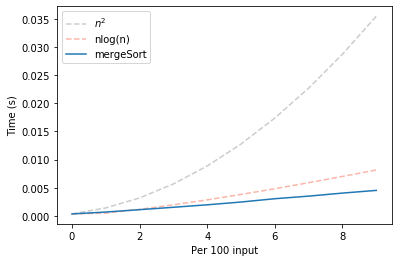

In [170]:
tester([mergeSort])

<br/>Right off the bat, it is clearly faster than original insertionSort, which has a growth rate of n^2.<br/>It is quite surprising that it even goes lower than the **nlog(n)** line. Even after a couple of runs, the run time of Merge Sort consistently goes under the red line.<br/>I am guessing this has to do with the initial factor setting. After the first run of the algorithm, an adjusting factor is recorded based on the first result, and subsequent measures will be multiplied against this factor. Obviously, this is not the perfect method, because there are a lot of factors contributing to run time, and it is too simplistic to assume every factor scales proportionally with amount of inputs. For example, a fixed amount of runtime overhead could be incurred every time the function is ran. This makes the runtime estimate **mN + O**, where O is a fixed time you have to pay for every run of the function.<br/><br/>
This is a resonable explanation to the graph above, as the real scaling factor m is considerably smaller than the implied factor f. I will just leave it here cuz it is not the main point of this study.<br/><br/>
How does it compare with our insertion sort?<br/>
**Comparing merge sort with insertion sort B we created, without the n^2 line:**

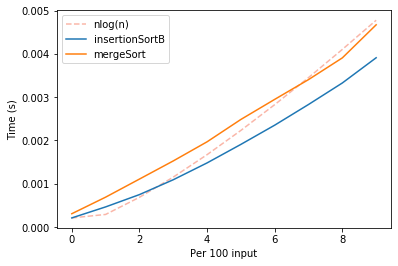

In [275]:
tester([insertionSortB, mergeSort], False)

Looks like our B sort edges a little ahead, even though I say the difference is too little to call a win. Sadly, I don't think there's any more trivial optimization that we can do to our insertionSortB. We could maybe stretch the binary part to even more partitions, but it is impossible to go out of the nlog(n) zone.<br/><br/>

Next, let's try **Radix Sort**.<br/><br/>
From wiki, radix sort is a non-comparative sorting algorithm. It avoids comparison by creating and distributing elements into buckets according to their radix. The simplest method seeks to compare digits from right to left, that is from the least significant digit to the most significant one.<br/><br/>
The only bottle neck of this sort occurs when the number of digits vary greatly, and the largest elements contains a large number of digit, which is both not the case for our dataset. That's why radix could be very quick in our tests.<br/><br/>
To compare numbers, it is apparent that comparing from the biggest digit is more efficient. You create buckets from every digit sort, and the buckets items will then get sorted within itself recursively.<br/>
<br/>
That would make neat sorting function.

In [0]:
def digitOf(number, digit):
  tstr = str(number)
  if len(tstr) < digit:
    return 0
  else:
    return int(tstr[-digit])

In [0]:
def radixSort(a_list, which = -1):

  if not which or len(a_list) == 1:
    return a_list

  buckets = {}
  result = []

  if which < 0:
    _max_ = max(a_list)
    POI = len(str(_max_))
  else:
    POI = which

  for it in a_list:
    thisb = digitOf(it, POI)
    if thisb not in buckets:
      buckets[thisb] = [it]
    else:
      buckets[thisb].append(it)
  
  for i in range(10):
    if i in buckets:
      _t = radixSort(buckets[i], POI - 1)
      result.extend(_t)
  
  return result

<br/><br/>To test that it is working:

In [278]:
newlist = [6, 7, 10, 652, 9, 3, 44, 35, 79]

_result = radixSort(newlist)
print(_result)

[3, 6, 7, 9, 10, 35, 44, 79, 652]


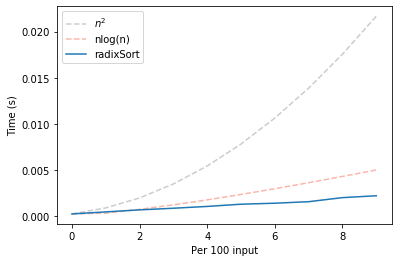

In [282]:
tester([radixSort])

As we have imagined, it performed nicely for our dataset. Let's put it side by side with mergesort and insertionB

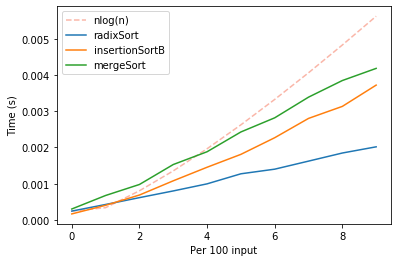

In [290]:
tester([radixSort, insertionSortB, mergeSort], False)

This has to be it I guess. Radix sort is obviously way ahead of both sorts I have coded. The nature of radixSort putting data into respective buckets, really distinguish itself from the others, especially within random datasets.<br/><br/>If I have a chance next time, I will try to compare other sorting methods with radix sort, the champion today.<br/><br/>
Lastly, a summary of all sortings we have today:

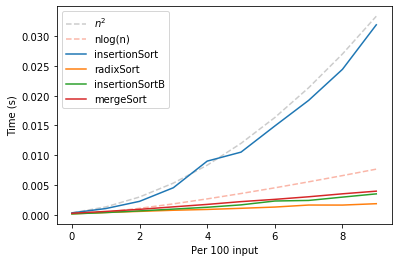

In [293]:
tester([insertionSort, radixSort, insertionSortB, mergeSort])